In [86]:
# Generate a large random dataset

# Compute the correlation matrix
corr = df.corr()

In [87]:
import seaborn as sns

In [88]:
# ddrop zipcodes


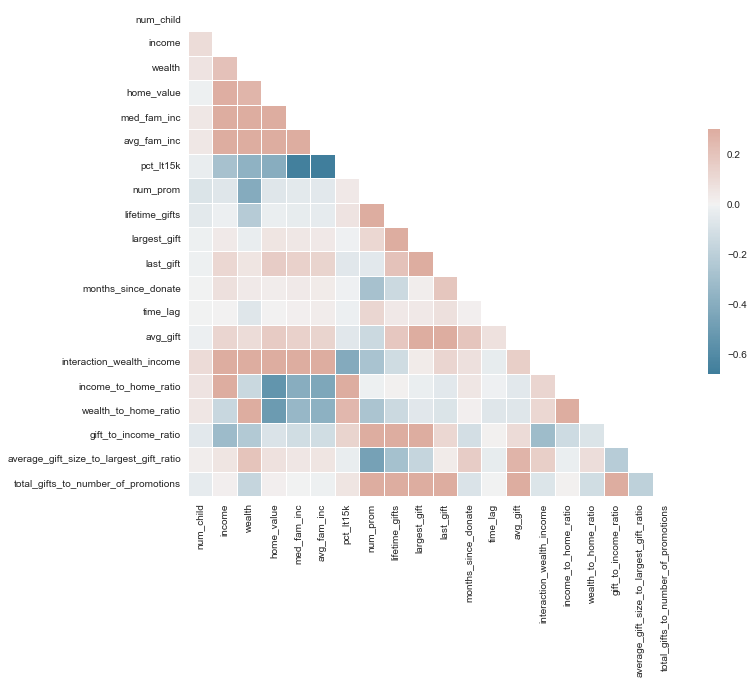

In [89]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# IMPORTS 

In [90]:
import pandas as pd
pd.set_option("max_colwidth", None)

import pycaret
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import * 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from functions.homebrew import *

# LOAD DATA

In [91]:
df = pd.read_csv('./data/df_complex.csv').drop('Unnamed: 0', axis=1)

df['type'].unique()

array(['train', 'dev', 'test'], dtype=object)

In [92]:
df = pd.read_csv('./data/df_complex.csv').drop('Unnamed: 0', axis=1)
dummies = pd.get_dummies(df, drop_first = True)

# Checking for any 'inf' or 'nan' values
inf_indices = np.isinf(dummies).any()
nan_indices = dummies.isna().any()
dummies = dummies.drop(dummies.columns[inf_indices], axis=1)



In [93]:
dummies['type_train']

0       1
1       1
2       1
3       1
4       1
       ..
3115    0
3116    0
3117    0
3118    0
3119    0
Name: type_train, Length: 3120, dtype: uint8

In [95]:
dummies.columns

Index(['num_child', 'income', 'wealth', 'home_value', 'med_fam_inc',
       'avg_fam_inc', 'pct_lt15k', 'num_prom', 'lifetime_gifts',
       'largest_gift', 'last_gift', 'months_since_donate', 'time_lag',
       'avg_gift', 'interaction_wealth_income', 'gift_to_income_ratio',
       'average_gift_size_to_largest_gift_ratio',
       'total_gifts_to_number_of_promotions', 'zipconvert2_Yes',
       'zipconvert3_Yes', 'zipconvert4_Yes', 'zipconvert5_Yes',
       'homeowner_Yes', 'female_Yes', 'target_No Donor', 'type_test',
       'type_train', 'homeowner_children_No_2', 'homeowner_children_No_3',
       'homeowner_children_No_4', 'homeowner_children_Yes_1',
       'homeowner_children_Yes_2', 'homeowner_children_Yes_3',
       'homeowner_children_Yes_4', 'homeowner_children_Yes_5',
       'zip_gender_No_No_No_No_Yes', 'zip_gender_No_No_No_Yes_No',
       'zip_gender_No_No_No_Yes_Yes', 'zip_gender_No_No_Yes_No_No',
       'zip_gender_No_No_Yes_No_Yes', 'zip_gender_No_Yes_No_No_No',
       '

In [99]:
train = dummies[dummies['type_train'] == 1]
test = dummies[dummies['type_test'] == 1]
dev = dummies[(dummies['type_test'] != 1) & (dummies['type_test'] != 1)]

# VIF

In [100]:
train = train.dropna()

# ATTEMPT WITH PYCARET

In [101]:
from pycaret.classification import setup, compare_models

# Initialize and setup the experiment
exp = setup(data=train, target='target_No Donor', session_id=27, fix_imbalance=True)

# Compare models to find the best one
best = compare_models()

,Description,Value
0,Session id,27
1,Target,target_No Donor
2,Target type,Binary
3,Original data shape,"(2400, 45)"
4,Transformed data shape,"(2418, 45)"
5,Transformed train set shape,"(1698, 45)"
6,Transformed test set shape,"(720, 45)"
7,Numeric features,44
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5536,0.5737,0.5501,0.5603,0.5541,0.1073,0.1077,0.0110
ridge,Ridge Classifier,0.5530,0.5748,0.5512,0.5594,0.5543,0.1060,0.1064,0.0110
lr,Logistic Regression,0.5512,0.5754,0.5548,0.5565,0.5542,0.1024,0.1028,0.7230
gbc,Gradient Boosting Classifier,0.5476,0.5661,0.5183,0.5577,0.5357,0.0960,0.0968,0.0730
rf,Random Forest Classifier,0.5470,0.5601,0.5266,0.5547,0.5391,0.0946,0.0951,0.0600
et,Extra Trees Classifier,0.5304,0.5374,0.5360,0.5343,0.5338,0.0607,0.0612,0.0520
ada,Ada Boost Classifier,0.5238,0.5489,0.5255,0.5282,0.5256,0.0478,0.0481,0.0320
lightgbm,Light Gradient Boosting Machine,0.5232,0.5380,0.5289,0.5292,0.5282,0.0464,0.0466,0.0860
dt,Decision Tree Classifier,0.5161,0.5160,0.5231,0.5214,0.5217,0.0320,0.0321,0.0130
nb,Naive Bayes,0.5119,0.5422,0.3514,0.5102,0.4020,0.0280,0.0250,0.0110


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

# DEV ACCURACTY

In [104]:
preds = predict_model(best, data=dev.drop(columns='target_No Donor'))
preds = preds['prediction_label']
actual = dev['target_No Donor']
accuracy_score(preds, actual)

0.5576666666666666

# FINE TUNING

In [106]:
tuned_best = tune_model(best, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5774,0.6139,0.6471,0.5729,0.6077,0.1533,0.1547
1,0.5238,0.5287,0.5412,0.5287,0.5349,0.0472,0.0472
2,0.5893,0.6371,0.6588,0.5833,0.6188,0.1772,0.1787
3,0.6131,0.6456,0.6235,0.6163,0.6199,0.2260,0.2260
4,0.5298,0.5793,0.5882,0.5319,0.5587,0.0582,0.0585
5,0.6488,0.6892,0.7059,0.6383,0.6704,0.2966,0.2983
6,0.5000,0.5294,0.4588,0.5065,0.4815,0.0010,0.0010
7,0.5238,0.5271,0.5647,0.5275,0.5455,0.0467,0.0468
8,0.5655,0.5476,0.6118,0.5652,0.5876,0.1300,0.1304


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [108]:
preds = predict_model(tuned_best, data=dev.drop(columns='target_No Donor'))
preds = preds['prediction_label']
actual = dev['target_No Donor']
accuracy_score(preds, actual)

0.554

In [144]:
preds = predict_model(tuned_best, data=test.drop(columns='target_No Donor'))['prediction_label']


inverted = 1 - preds
final_preds = []
for i in inverted:
    if i == 1:
        final_preds.append('Donor')
    else:
        final_preds.append('No Donor')
        
save_df = pd.DataFrame(final_preds, columns=['values'])
df.to_csv('./preds/preds2.csv', index=False)

save_df = pd.DataFrame(preds, columns=['values'])
df.to_csv('./preds/preds3.csv', index=False)

In [142]:
import os
os.getcwd()

'C:\\Users\\dansc\\Documents\\Gradschool\\Predictive-Modeling\\Fundraising'